# Demo on visualization
- plotting error masks
- plotting lineage
- stetching cells on phase video 
- more possible combination of plot

In [1]:
import sys
import os

# Append the directory of the module to the Python path
sys.path.append("/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit")

In [2]:
from cell import Cell
import cells_extractor 
import visualizer
from cell_event import CellEvent, CellDefine, CellType
from link_composer import LinkComposer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

**Plotting error mask**

In [4]:
mask_folder = "/Users/sherryyang/Documents/wiggins-lab/data/f/masks/*.png"
phase_folder = "/Users/sherryyang/Documents/wiggins-lab/data/f/phase/*c1.tif"
composer = LinkComposer.read_folder(mask_folder=mask_folder, phase_folder=phase_folder)

Frame:7, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:11, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:13, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:22, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


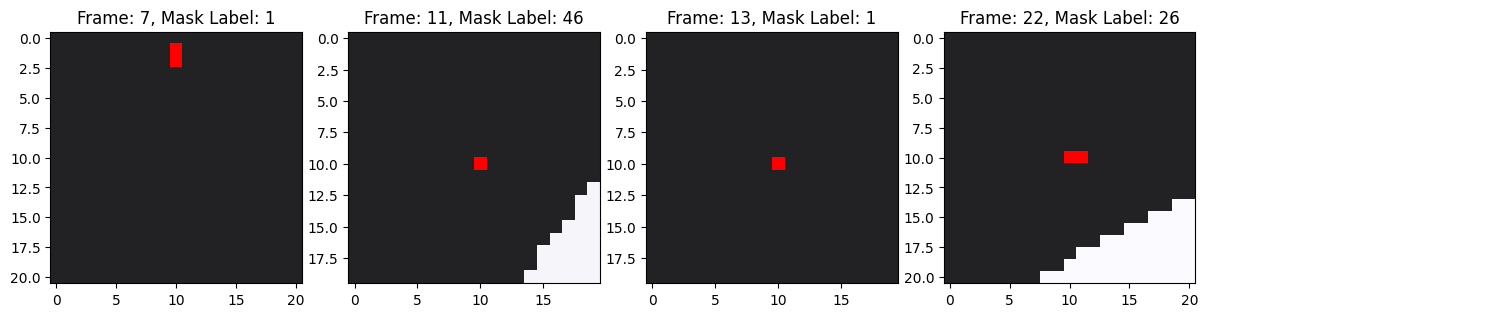

In [5]:
composer.show_mask_error()

**Plot lineage**

In [6]:
import link_algorithm
G = link_algorithm.silly_linker(composer)

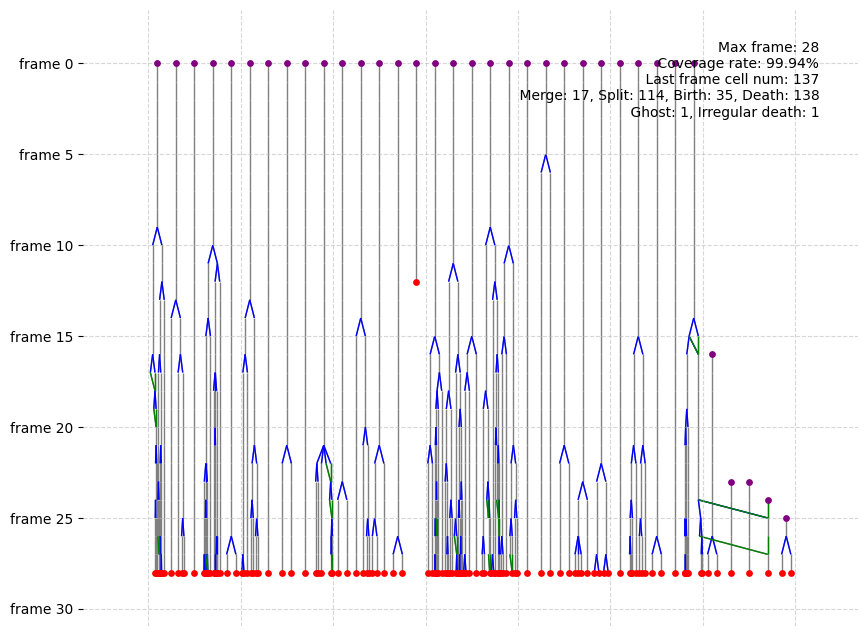

In [7]:
# some overlap algo n merge and n split
visualizer.quick_lineage(G)

Only plot the edges connected to certain frame, by get single_frame_lineage_info, and put result into graph

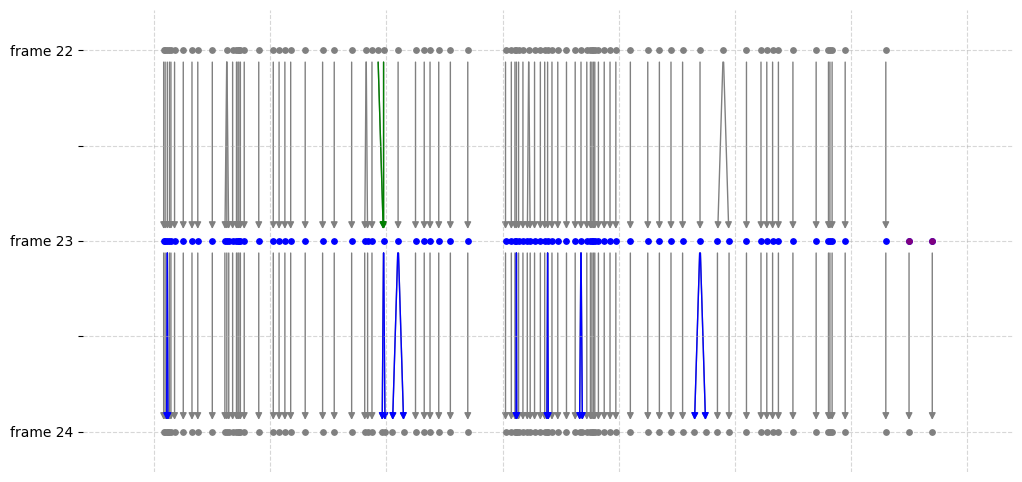

In [8]:
cell_s, edge_s, pos_even = visualizer.get_single_frame_lineage_info(G, 23)
pos = visualizer.get_lineage_pos(G)
visualizer.plot_lineage(G, pos, with_background=False, nodes_special=cell_s, edges_special=edge_s, arrow=True, show_stat=False, figsize=(12, 6))

highlight info on certain frame on the global lineage  \
same function but with_background= True

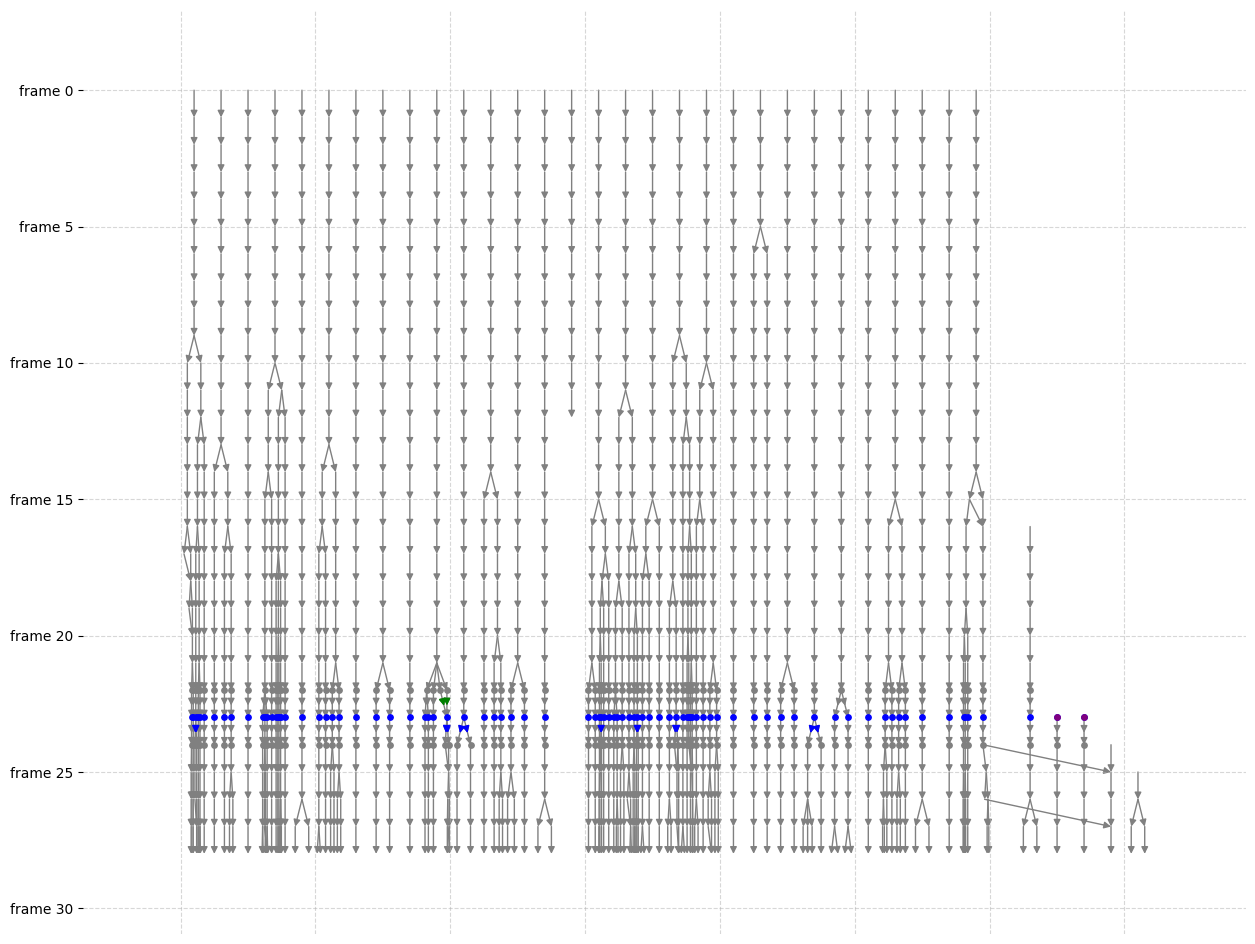

In [9]:
visualizer.plot_lineage(G, pos, with_background= True, nodes_special=cell_s, edges_special=edge_s, arrow=True, show_stat=False)

In [10]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/f/spots_filamented.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/f/track_filamented.csv"
G1 = composer.get_trackmate_linking_result(spots_filename, edge_filename, UNIT_CONVERT_COEFF= 100)

/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:3732 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:3951 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:3978 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:4054 match

/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:5203 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")


highlight show the difference edges on lineage \
also has other possbilities for lineage, just pass edges_special = {color, set(edge)}, and node_special = {color, set(node)} to plot_lineage

<Figure size 1500x1200 with 0 Axes>

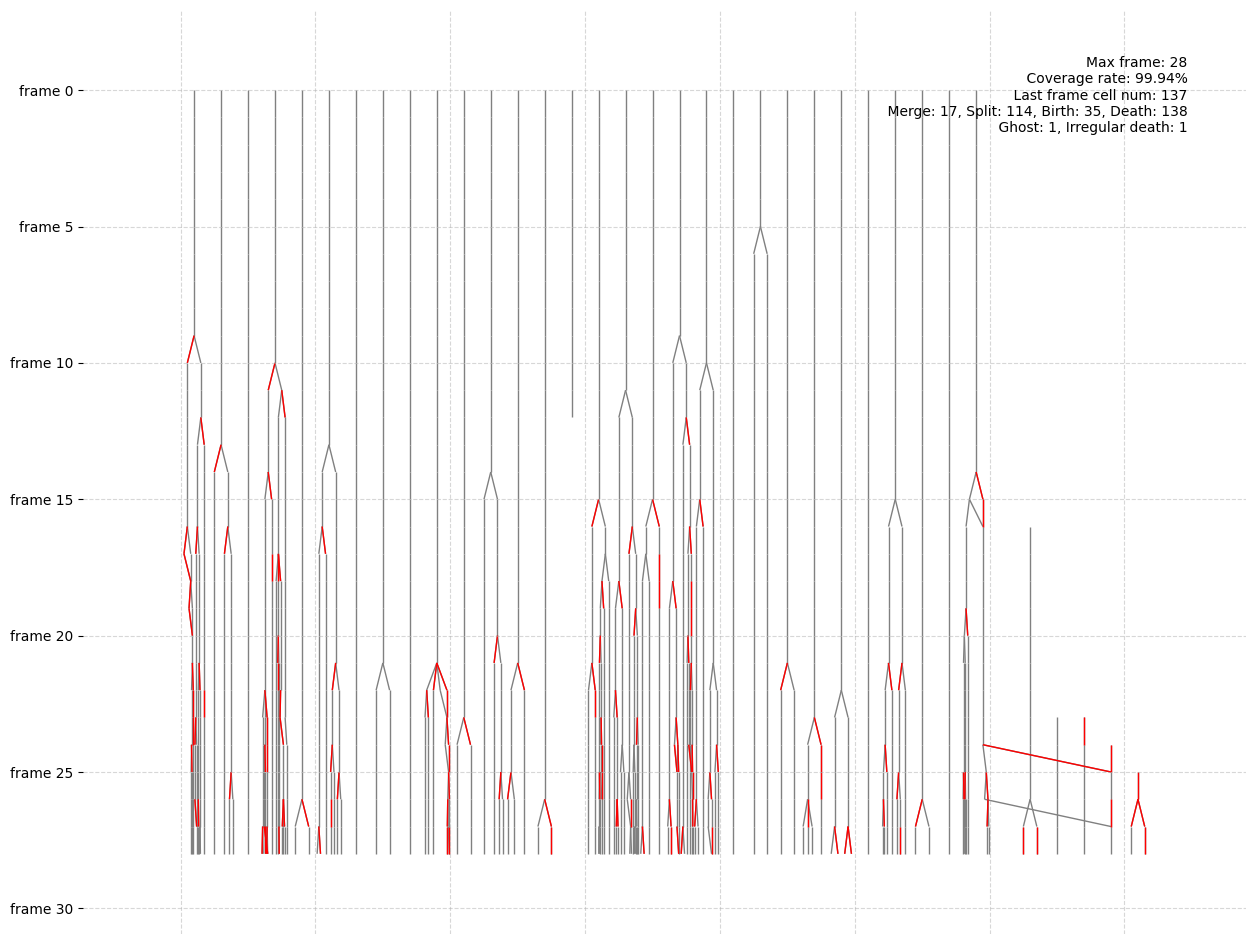

In [11]:
G_combined = nx.compose(G1, G)
G_extra_edge = set(G.edges()).difference(set(G1.edges()))

pos = visualizer.get_lineage_pos(G_combined)
edges_s = {"red": G_extra_edge}

plt.figure(figsize=(15, 12)) 
visualizer.plot_lineage(G, pos, with_background=True, edges_special=edges_s, arrow=False)

**Stetch labeled cells on phase image**

make an empty graph G3, and test the show frame phase, it display all ghost cells

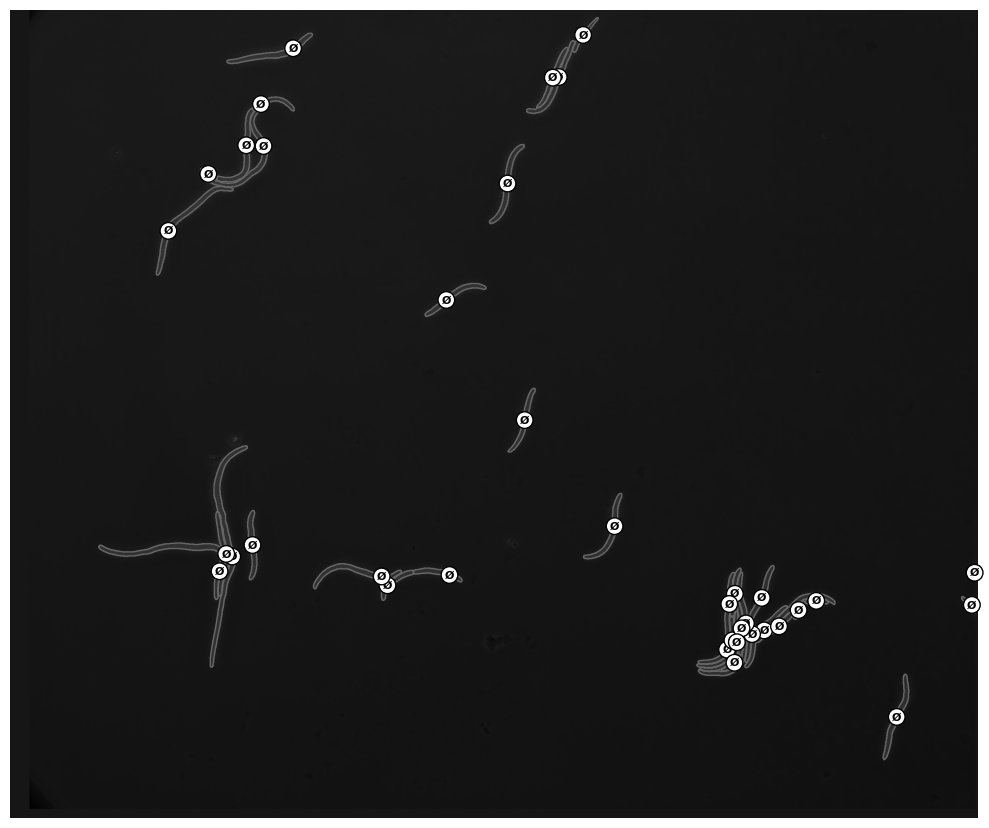

In [12]:
G3 = composer.make_new_dircted_graph()
label_info = visualizer.get_label_info(G3)
# show phase image of an empty graph
composer.show_frame_phase(G = G3, frame = 12, info = label_info, circle_label=True, figsize = (10,10), representative_point=True)

showing phase image for normal data:
 - get_label_info(G) gives labels by cell events, which highligh cell when it split/merge/die/birth
 - two styles of labels: 
    - circle_label = True label with in an round white tag
    - circle_label = False, label in plain white text
- location of labels
    - representative_point = True, put label on polygon's representative_point, this point is promise to be inside the polygon.
    - representative_point = False, use centeriod point of polygon

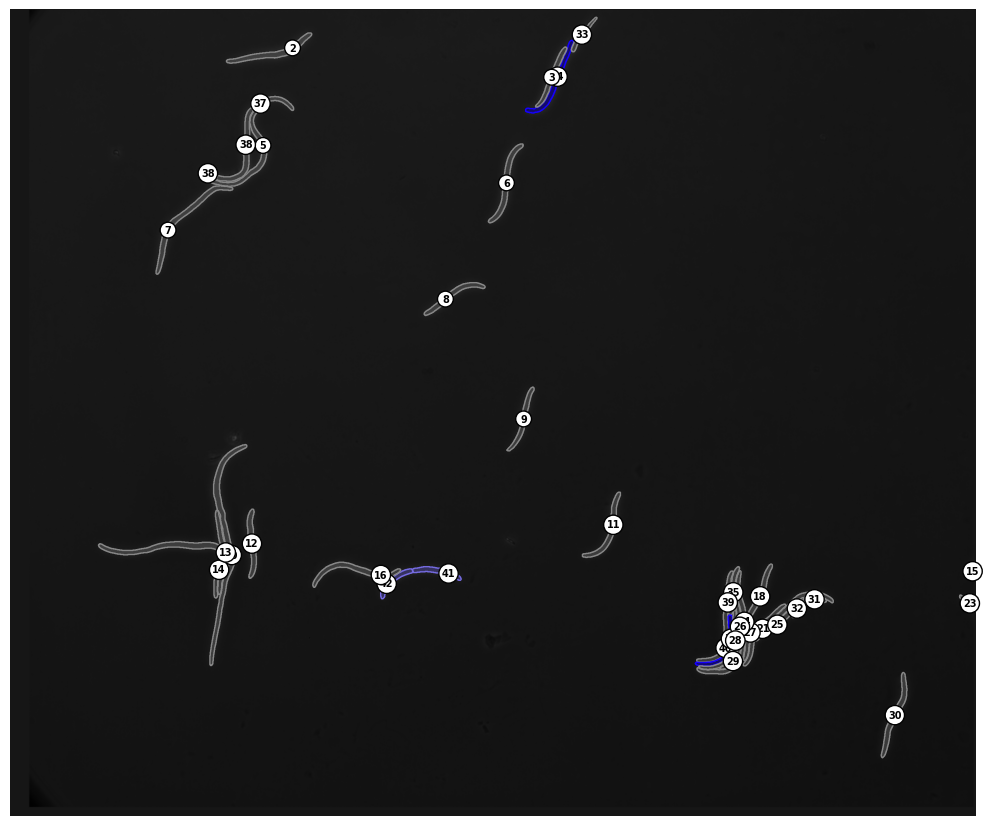

In [13]:
label_info = visualizer.get_label_info(G)
composer.show_frame_phase(G = G, frame = 12, info = label_info, circle_label=True, fontsize = 7, figsize = (10,10), representative_point=True)

Another labeling method provided is the generation label. This approach involves marking each original cell with an alphabet letter, followed by using numbers to record its generation. For example, "d2" indicates that they are the grandchildren of the original cell labeled "d."

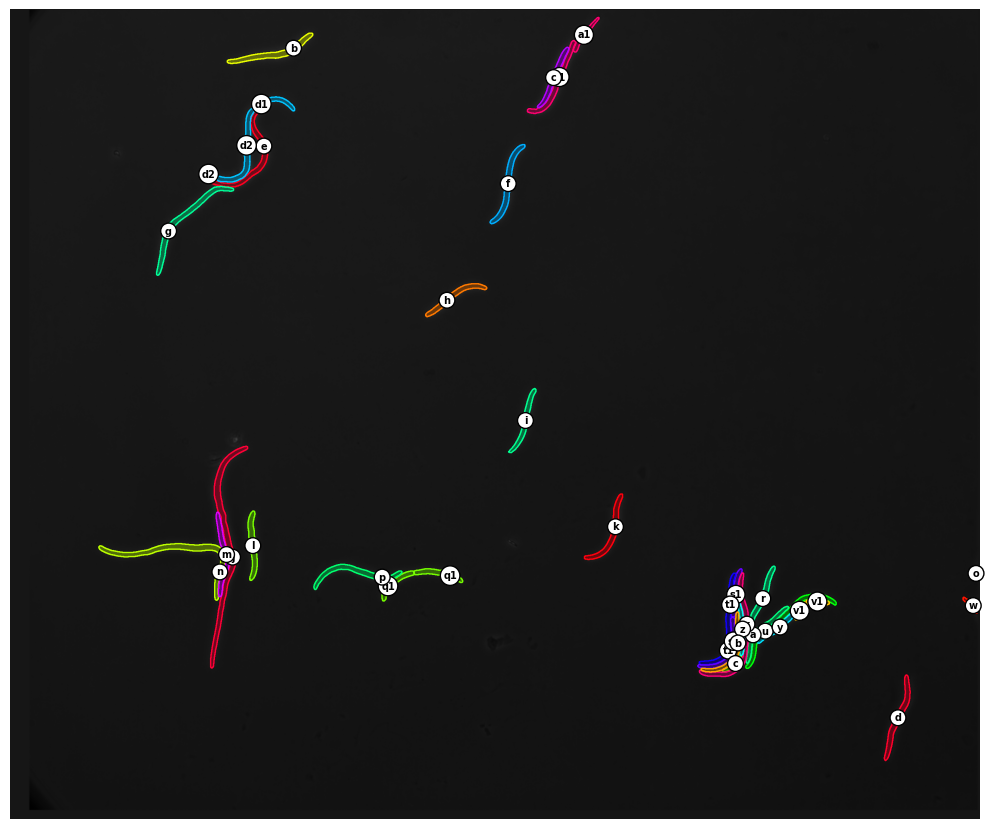

In [17]:
label_info = visualizer.get_generation_label_info(G)
composer.show_frame_phase(G = G, frame = 12, info = label_info, circle_label=True, fontsize = 7, figsize = (10,10), representative_point=True)

**Also could pass any arbitray label you like, just input a dictionary with info = {cell, [label, color]}**
- for example, I could write an really simple one, I could make the label be their mask label, and randomized color for each label

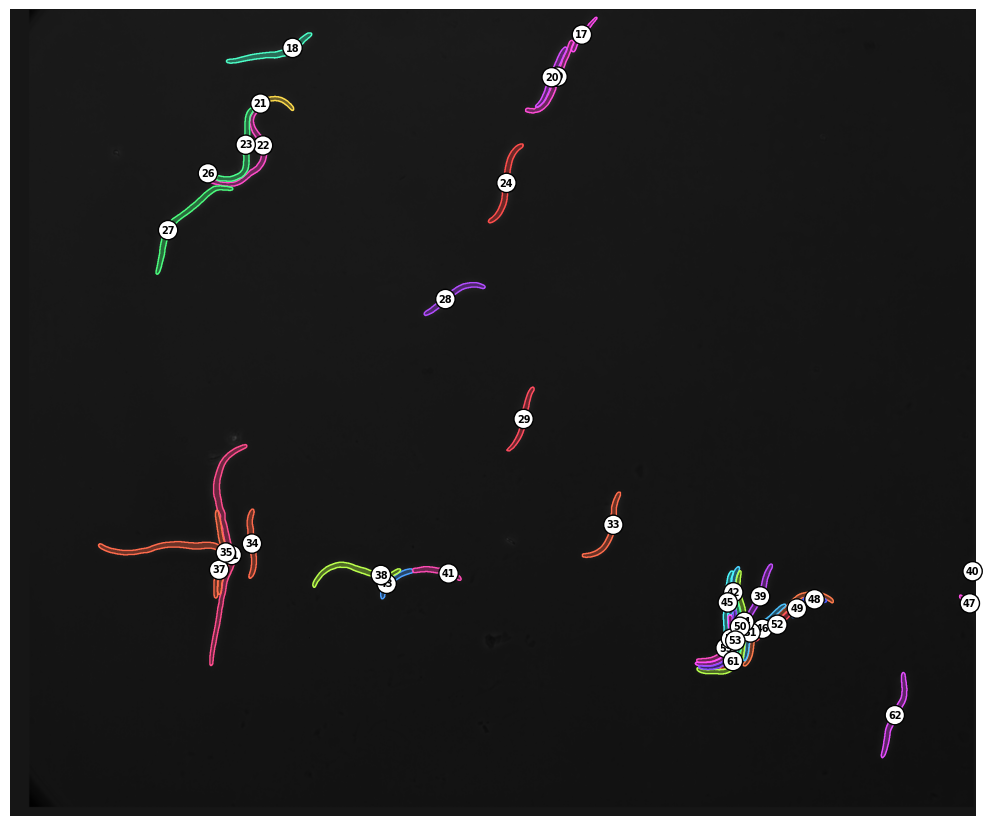

In [18]:
import random
color_dic = {}
mask_label_info = {}
random.seed(1)
for cell in composer.cells:
    if cell.label in color_dic:
        color = color_dic[cell.label]
    else:
        color = visualizer.new_color(random.random(), 0.7, 1)
        color_dic[cell.label] = color 
    mask_label_info[cell] = [cell.label, color]
# if you want evey frame, just loop through it, just show 1 frame for demo
composer.show_frame_phase(G = G, frame = 12, info = mask_label_info, circle_label=True, fontsize = 7, figsize = (10,10), representative_point=True)

Another label example: highlight difference linking edge between two linking algorithm:

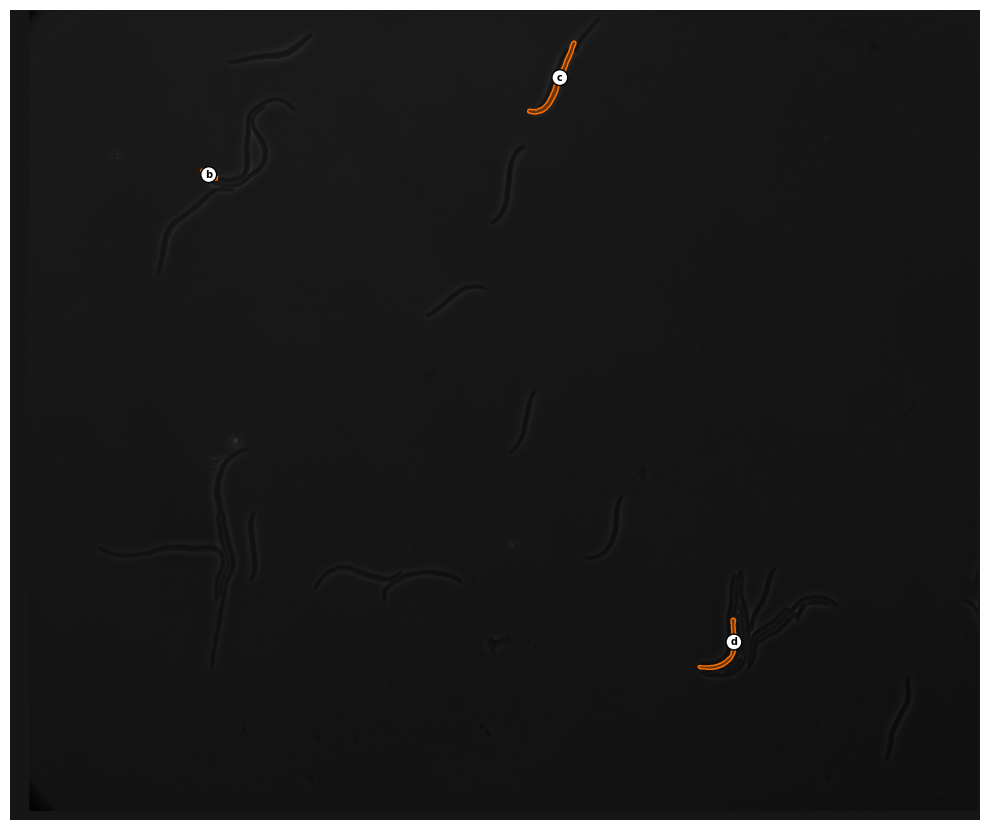

In [19]:
G_extra_edge = set(G.edges()).difference(set(G1.edges()))
warning_label = visualizer.get_edges_related_label_info(G, G_extra_edge)
composer.show_frame_phase(G = G, frame = 12, info = warning_label, circle_label=True, fontsize = 7, figsize = (10,10), representative_point=True)

**Combined visualization into a big plot by using subplot:**
- sub_plot_lineage, and subplot_single_frame_phase, are the more foundamation level of plot method, it plot on a ax object, so you could call them in your master plot

In [22]:
import matplotlib.gridspec as gridspec
def make_multi_visualization(composer, G, info, frame):
    # Your initial setup...
    fig = plt.figure(figsize=(8, 8))

    # Define GridSpec
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5]) 

    # Create each subplot using GridSpec
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # 1st subplot for the lineage graph
    cell_s, edge_s, pos_even = visualizer.get_single_frame_lineage_info(G, frame)
    ax1 = visualizer.subplot_lineage(ax1, G, pos, with_background=False, nodes_special=cell_s, edges_special=edge_s, arrow=True, show_stat=False)
    ax1.set_axis_on()

    # 2nd subplot for the image
    image = composer.get_single_frame_phase(frame)
    ax2 = visualizer.subplot_single_frame_phase(ax=ax2, image=image, cells_frame_dict=composer.cells_frame_dict, info= info, frame=frame)
    ax2.set_axis_off()

    # Show the figure
    plt.tight_layout()
    plt.show()

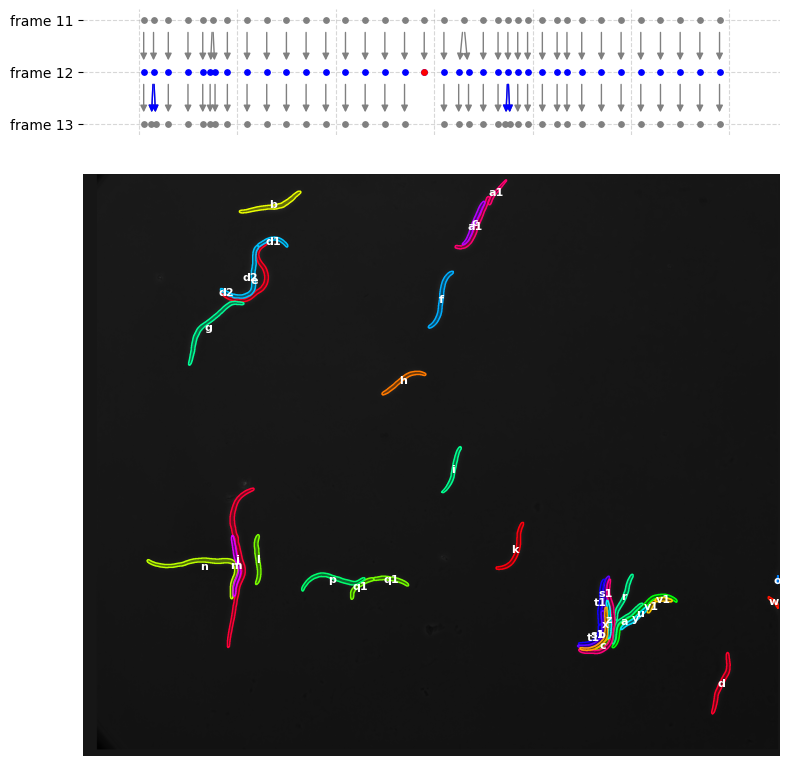

In [23]:
make_multi_visualization(composer, G, label_info, 12)

make a combination of more linking algorithm:

In [24]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/f/spots_lap.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/f/edges_lap.csv"
G2 = composer.get_trackmate_linking_result(spots_filename, edge_filename, UNIT_CONVERT_COEFF= 100)

/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:5519 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:5292 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:5566 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:5598 match

/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:6830 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")
/Users/sherryyang/Projects/super-segger-toolkit/superseggertoolkit/link_composer.py:258: UserWarning: Trackmate cell:6658 match back to mask is inaccute, assigned to the nearest cell.
  warnings.warn(f"Trackmate cell:{cell_id} match back to mask is inaccute, assigned to the nearest cell.")


In [25]:
Glist = {"a.simple advanced overlap": G, "a.trackmate overlap": G1,  "a.trackmate Lap": G2}

In [26]:
def make_single_frame_comparison(composer, Glist, frame):
    n_cases = len(Glist)
    G_index = sorted(Glist)

    tag_dic, info_dic, pos_dic = {}, {}, {}
    for name, G in Glist.items():
        tag_dic[name] = visualizer.tag_type(G)
        info_dic[name] = visualizer.get_label_info(G)
        pos_dic[name] = visualizer.get_lineage_pos(G)

    # Master figure setup
    fig = plt.figure(figsize=(8 * n_cases, 10))  # Adjust the size as needed
    plt.axis('off')
    gs = gridspec.GridSpec(2, n_cases, height_ratios=[1, 5])  # 2 rows, n_cases columns

    for i in range(len(G_index)):
        name = G_index[i]
        G = Glist[name]
        
        tag = tag_dic[name]
        info = info_dic[name]
        pos = pos_dic[name]

        ax1 = fig.add_subplot(gs[0, i])
        ax2 = fig.add_subplot(gs[1, i])

         # 1st subplot for the lineage graph
        cell_s, edge_s, pos_even = visualizer.get_single_frame_lineage_info(G, frame)
        ax1 = visualizer.subplot_lineage(ax1, G, pos, with_background=False, nodes_special=cell_s, edges_special=edge_s, arrow=True, show_stat=False)
        ax1.set_axis_on()


        # 2nd subplot for the image
        image = composer.get_single_frame_phase(frame)
        ax2 = visualizer.subplot_single_frame_phase(ax=ax2, image=image, cells_frame_dict=composer.cells_frame_dict, info= info, frame=frame, show_label = False)
        ax2.set_axis_off()
        ax2.set_title(name) 


    plt.tight_layout()
    plt.show()
    #plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=False)

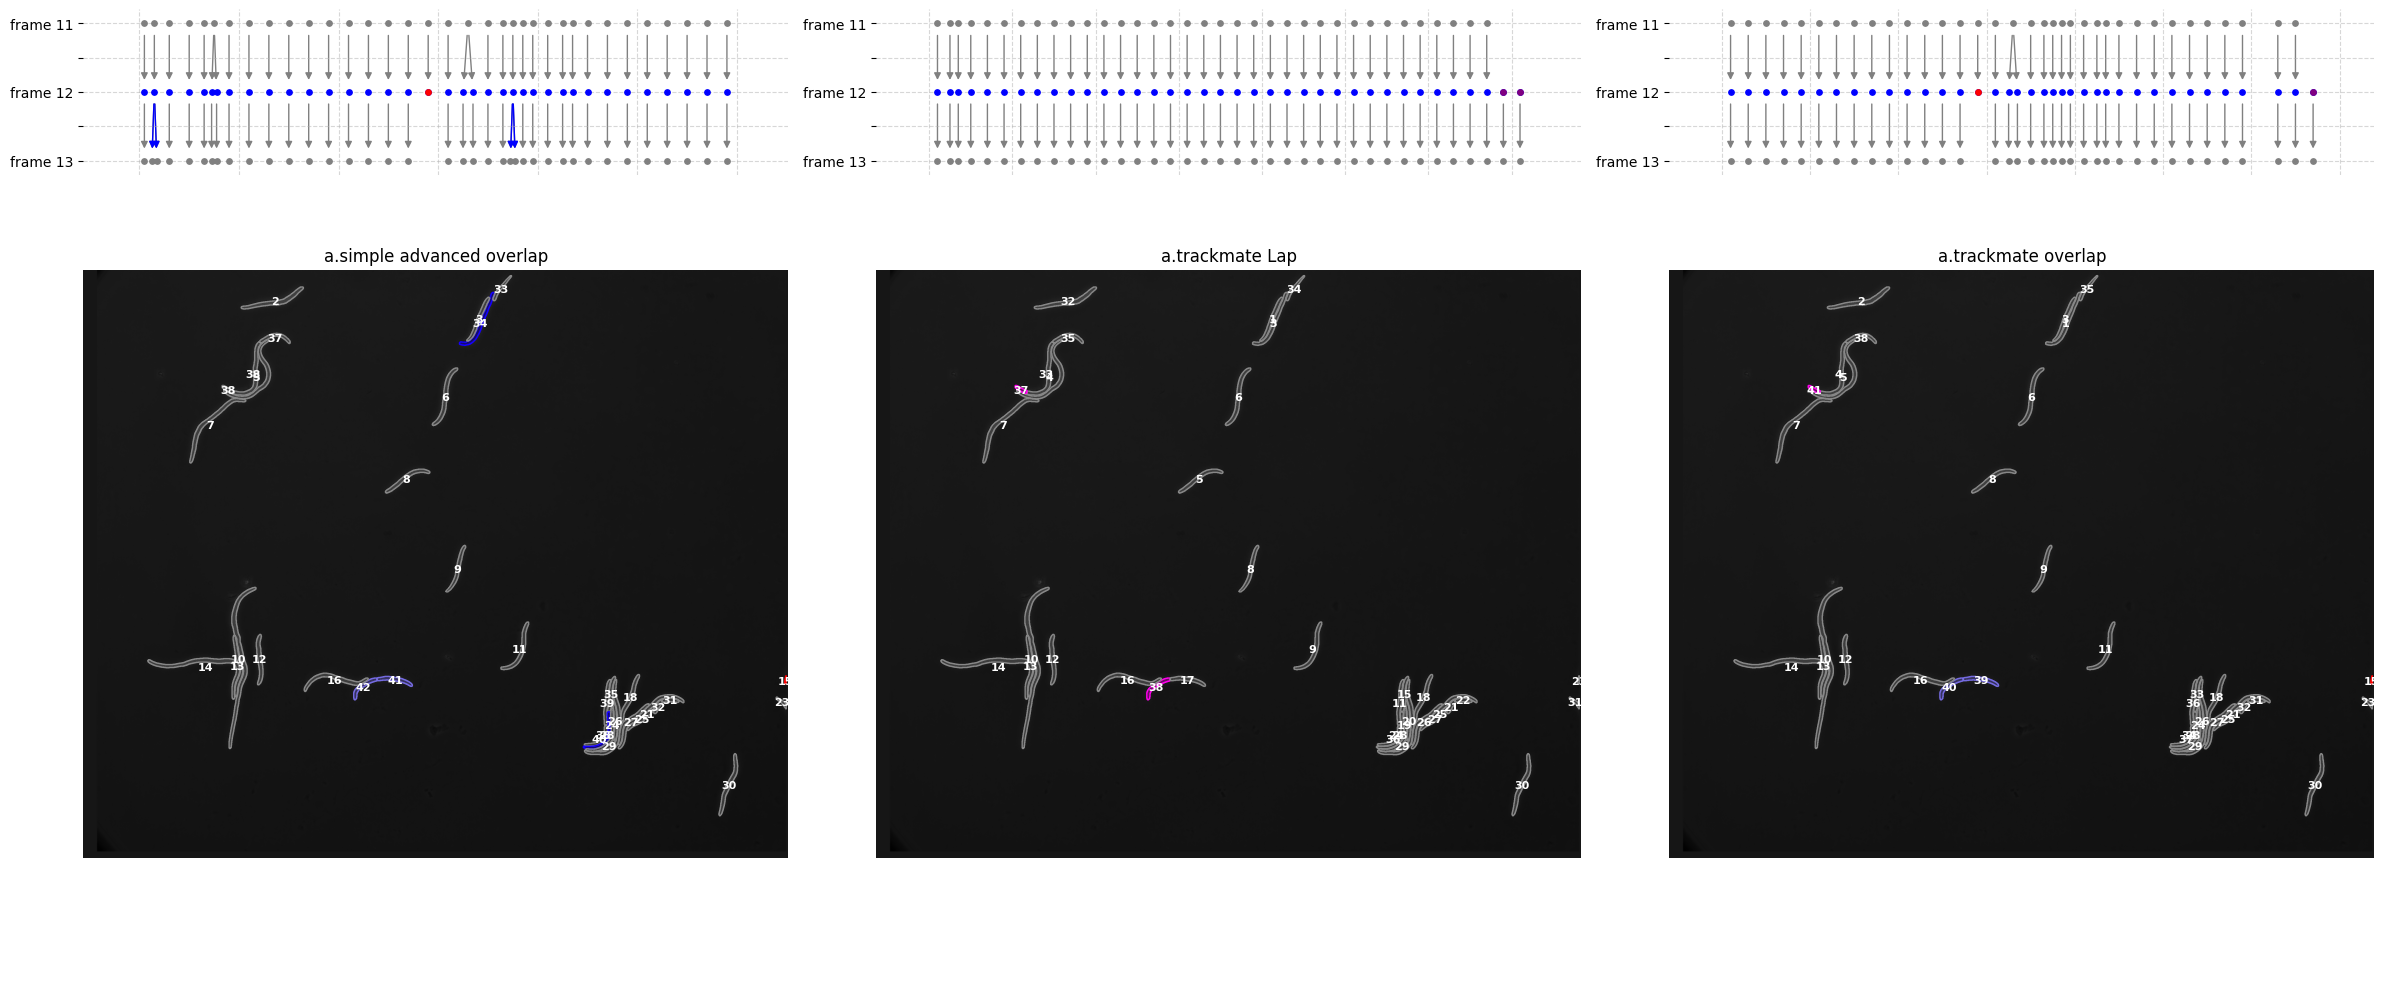

In [28]:
make_single_frame_comparison(composer, Glist, 12)

In [29]:
from visualizer import CELL_EVENT_COLOR

def make_lineage_comparison(Glist):
    n_cases = len(Glist)
    G_index = sorted(Glist)

    tag_dic, pos_dic = {}, {}
    for name, G in Glist.items():
        tag_dic[name] = visualizer.tag_type(G)
        pos_dic[name] = visualizer.get_lineage_pos(G)

    # Master figure setup
    fig, axes = plt.subplots(1, n_cases, figsize=(8 * n_cases, 10))  # 1 row, n_cases columns

    # Ensure axes is an array even when n_cases is 1
    axes = np.atleast_1d(axes)

    for i, name in enumerate(G_index):
        G = Glist[name]
        tag = tag_dic[name]
        pos = pos_dic[name]

        cells_s = {CELL_EVENT_COLOR[CellEvent.BIRTH]: tag[CellEvent.BIRTH], CELL_EVENT_COLOR[CellEvent.DIE]: tag[CellEvent.DIE]}
        edges_s = {CELL_EVENT_COLOR[CellEvent.SPLIT]: tag[CellEvent.SPLIT], CELL_EVENT_COLOR[CellEvent.MERGE]: tag[CellEvent.MERGE]}

        ax = axes[i]
        ax = visualizer.subplot_lineage(ax, G, pos, with_background=True, nodes_special=cells_s, edges_special=edges_s, arrow=True, show_stat=False)
        ax.set_title(name)

    plt.tight_layout()
    plt.show()


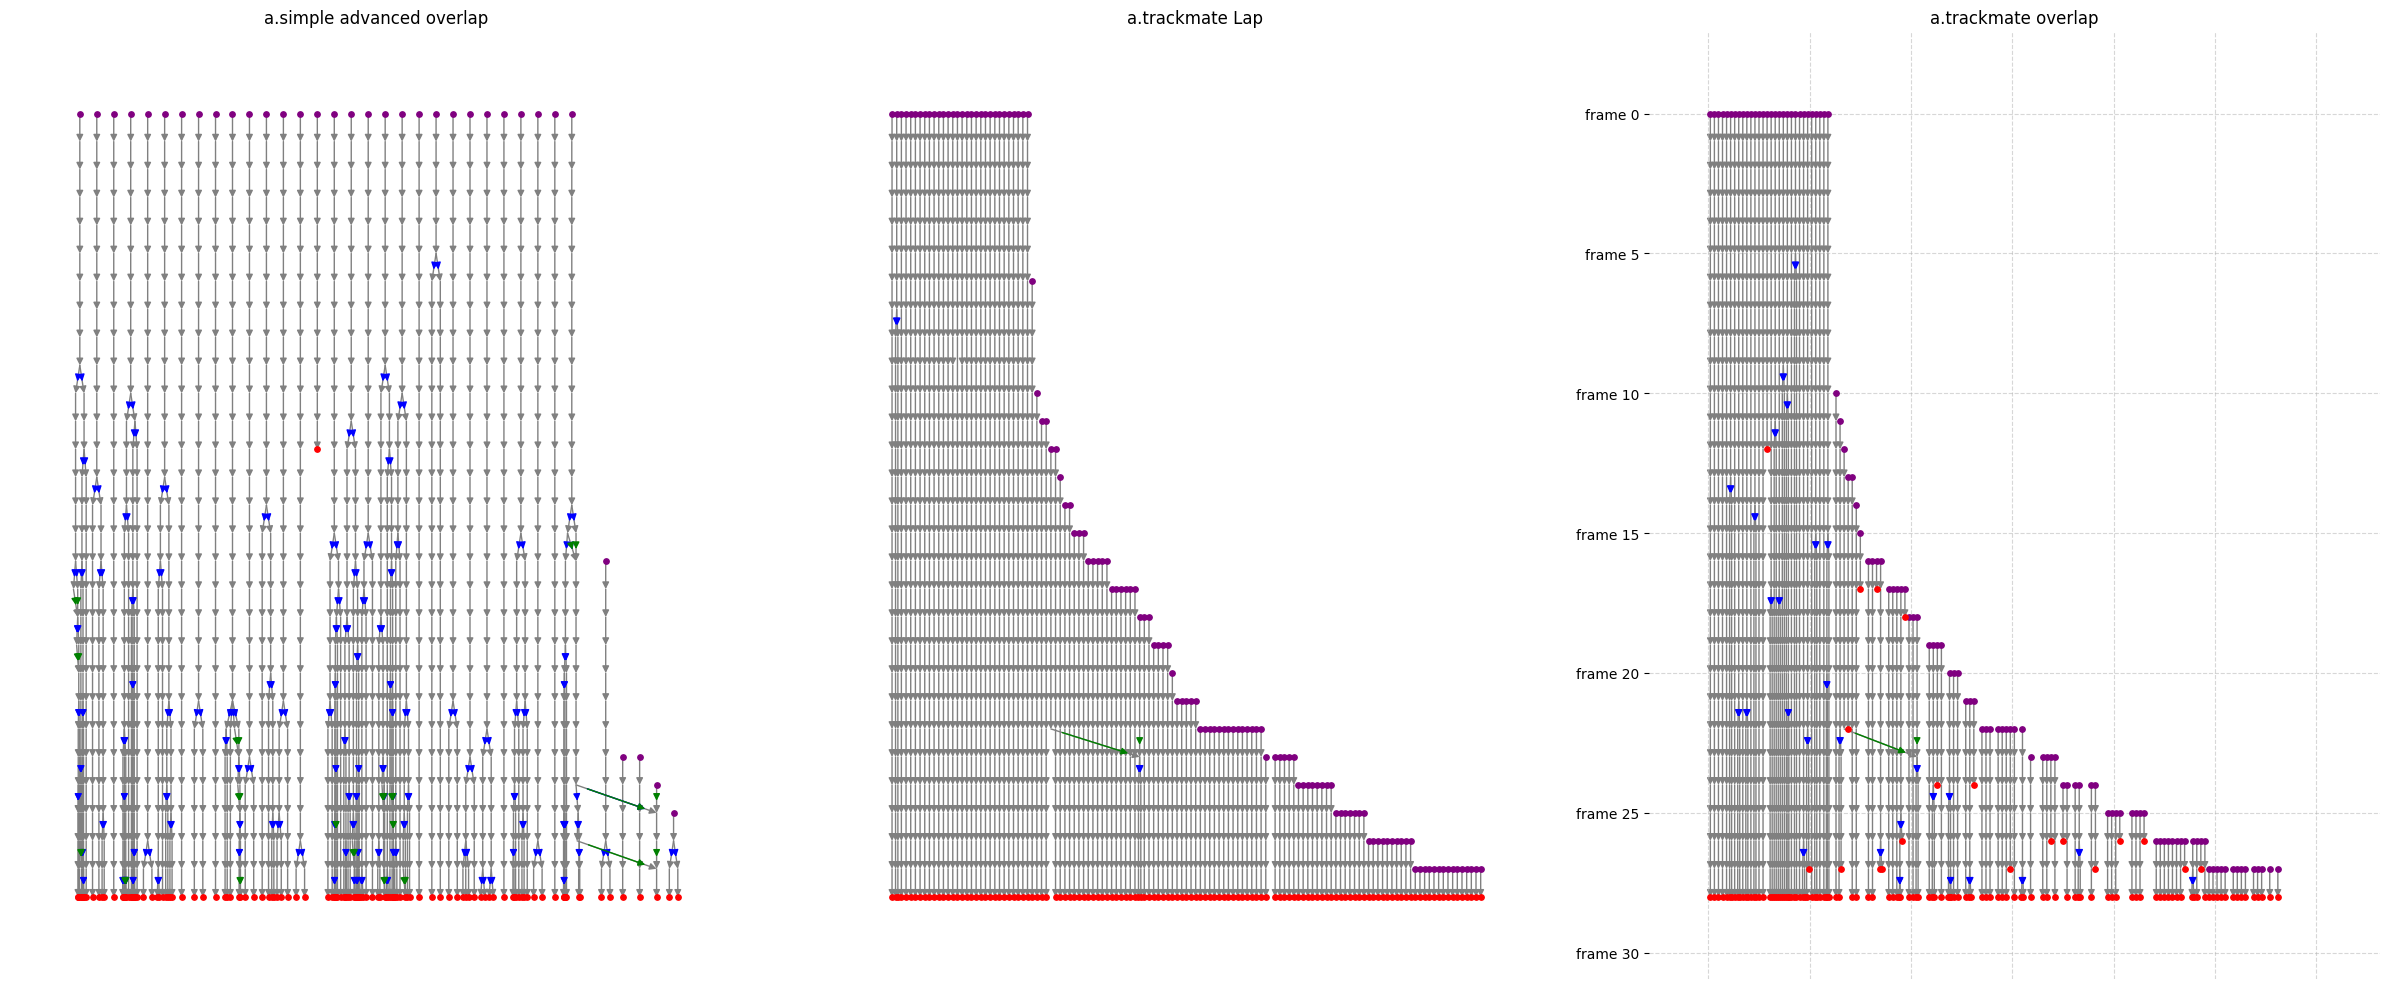

In [31]:
make_lineage_comparison(Glist)